In [1]:
import numpy as np
from random import randint
from random import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def submatrix(x,i,j,vr):
    return x[i-vr:i+vr+1,j-vr:j+vr+1]

In [3]:
#parameters
n_episodes=300 # how many episodes
t_episode=200 # how many time steps in an episode



#Definition of world
max_x=10
max_y=10
world_state=np.zeros((max_x,max_y),int)
for i in range(10):
    world_state[randint(0,max_x-1),randint(0,max_y-1)]=1

reset_world=np.copy(world_state)
    
def get_reward(agent_pos):
    revalue=float(world_state[agent_pos[0],agent_pos[1]])
    if world_state[agent_pos[0],agent_pos[1]]==1:
        world_state[agent_pos[0],agent_pos[1]]=0
    return revalue
        
action_directions=[np.array([-1,0]), np.array([0,1]), np.array([1,0]), np.array([0,-1])]

def move_agent(action,agent_pos):
    agent_pos=agent_pos+action_directions[action]
    if agent_pos[0]>max_x-1:
        agent_pos[0]=max_x-1
    elif agent_pos[0]<1:
        agent_pos[0]=1
    elif agent_pos[1]>max_y-1:
        agent_pos[1]=max_y-1
    elif agent_pos[1]<1:
        agent_pos[1]=1
    return agent_pos
        
        
#Definition of agent
view_range=2
discount_factor=0.7 # gamma

def choose_action(obs):
    if obs in Q:
        if max(Q[obs])==0:
            return randint(0,3)
        elif random()<0.1:
            return randint(0,3)                        
        else:    
            return np.array(Q[obs]).argmax() #known state -> choose action with largest Q(s,a)
    else:
        return randint(0,3) #unknown state -> choose random action
    
def Q_update(obs_t, a_t, obs_t_plus_one, r_t_plus_one, learning_rate):
    Q[obs_t][a_t] = Q[obs_t][a_t] + learning_rate * (r_t_plus_one + discount_factor * max(Q[obs_t_plus_one]) - Q[obs_t][a_t])


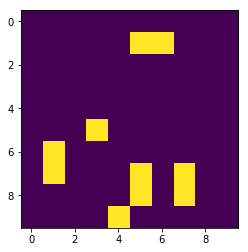

In [11]:
plt.imshow(reset_world, interpolation=None, cmap='viridis');
world_state=np.copy(reset_world)

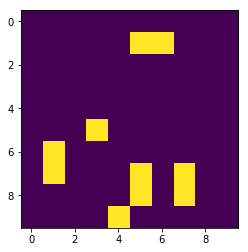

In [12]:
world_state;
plt.imshow(world_state, interpolation=None, cmap='viridis');

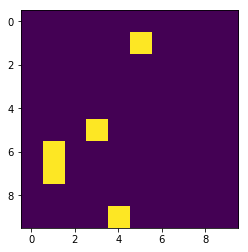

In [13]:
Q={}
episodes=[]

for n in range(n_episodes):
    episode=[]
    agent_pos=np.array([int(max_x/2),int(max_y/2)])
    world_state=np.copy(reset_world)
    for t in range(t_episode):
        reward=get_reward(agent_pos)
        observed_state=submatrix(world_state,agent_pos[0],agent_pos[1],view_range) #observe state
        observed_state=str(observed_state.flatten()) #convert state to string key
        action=choose_action(observed_state) #choose action
        episode.append([observed_state, action, reward]) #save state into episode
        agent_pos=move_agent(action,agent_pos) # take action (move)
        if not(observed_state in Q):
            Q[observed_state]=[0,0,0,0] #add state to Q if it is not already present there
    for k in range(20):
        for t in range(t_episode-1):
            Q_update(episode[t][0],episode[t][1],episode[t+1][0],episode[t+1][2],1)
    episodes.append(episode) # save episode
    plt.imshow(world_state, interpolation=None, cmap='viridis');

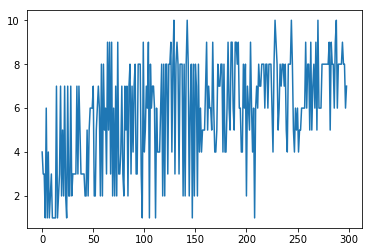

In [14]:
total_reward=[]
for i in range(n_episodes-1):
    sum=0.0
    for j in range(t_episode-1):
        sum+=episodes[i][j][2]
    total_reward.append(sum)
plt.plot(range(len(total_reward)),total_reward);

In [15]:
episode

[['[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1]', 2, 0.0],
 ['[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1]', 2, 0.0],
 ['[1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0]', 3, 1.0],
 ['[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0]', 1, 0.0],
 ['[1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0]', 2, 0.0],
 ['[0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0]', 1, 1.0],
 ['[0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0]', 1, 0.0],
 ['[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]', 0, 1.0],
 ['[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]', 0, 1.0],
 ['[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]', 0, 0.0],
 ['[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]', 0, 0.0],
 ['[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]', 0, 0.0],
 ['[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]', 0, 0.0],
 ['[0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]', 3, 0.0],
 ['[0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]', 0, 0.0],
 ['[]', 1, 1.0],
 ['[]', 1, 0.0],
 ['[]'

In [16]:
Q

{'[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]': [0.3805564717262258,
  0.23638890195835727,
  0.17303631156538174,
  0.2845435316882855],
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]': [0.2845435316882855,
  0.17905078013867415,
  0.4221247250957672,
  0.1957394796089408],
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]': [0.11158510948385761,
  0.06533456380480857,
  0.11094567776578314,
  0.295487307567037],
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]': [0.03830909723014677,
  0.17905923931589218,
  0.07715829792121408,
  0.3159385888958306],
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]': [0.20149178124519965,
  0.11106874361790255,
  0.05845713195229849,
  0.05538674949009018],
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]': [0.17668688025550908,
  0.11460847495452829,
  0.06748298285614118,
  0.22113891756001933],
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]': [0,
  0.09371959740067322,
  0,
  0.04959404518031695],
 '[0 0 0

In [102]:
for n in range(n_episodes-1):
    for t in range(t_episode-1):
        Q_update(episodes[n][t][0],episodes[n][t][1],episodes[n][t+1][0],episodes[n][t+1][2],0.1)